In [1]:
import pandas as pd
import pickle
import datetime as dt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [2]:
#from LogIn import LogIn
#kite = LogIn().return_kite_obj()

In [3]:
budget_df = pd.read_csv('budget_new.csv')

In [4]:
budget_df = budget_df[budget_df['instrument']!='NSE:MRF']

In [5]:
budget_df['return'] = 0.05

In [6]:
budget_df['budget'] = 25000

In [7]:
budget_df

,instrument,budget,return
0,NSE:ACCELYA,25000,0.05
1,NSE:GOLDBEES,25000,0.05
2,NSE:GOLDSHARE,25000,0.05
3,NSE:NIFTYBEES,25000,0.05
4,NSE:POWERGRID,25000,0.05
5,NSE:WIPRO,25000,0.05
6,NSE:BIOCON,25000,0.05
7,NSE:COLPAL,25000,0.05
8,NSE:WABCOINDIA,25000,0.05
9,NSE:ASIANPAINT,25000,0.05


# Inputs

In [8]:
begin = "2015-02-01"
end = "2020-05-31"

In [9]:
leverage = 10
exit_time = dt.time(15, 10)

# Process

In [10]:
import datetime

# borrowed from https://stackoverflow.com/a/13565185
# as noted there, the calendar module has a function of its own
def last_day_of_month(any_day):
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4)  # this will never fail
    return next_month - datetime.timedelta(days=next_month.day)

def monthlist(begin,end):
    begin = datetime.datetime.strptime(begin, "%Y-%m-%d")
    end = datetime.datetime.strptime(end, "%Y-%m-%d")

    result = []
    while True:
        if begin.month == 12:
            next_month = begin.replace(year=begin.year+1,month=1, day=1)
        else:
            next_month = begin.replace(month=begin.month+1, day=1)
        if next_month > end:
            break
        result.append ([begin.strftime("%Y-%m-%d"),last_day_of_month(begin).strftime("%Y-%m-%d")])
        begin = next_month
    result.append ([begin.strftime("%Y-%m-%d"),end.strftime("%Y-%m-%d")])
    return result


date_list = monthlist(begin,end)

In [11]:
def get_clean_data(instrument):
    
    print(instrument)

    all_data_df = pd.DataFrame()

    for time_range in date_list:
        print(time_range)

        from_date = time_range[0]
        to_date = time_range[1]

        data_df = pd.read_pickle('./data_new/{}_{}_{}.pkl'.format(instrument, from_date, to_date))

        data_df.rename(columns={'date':'timestamp'}, inplace=True)
        data_df['date'] = data_df['timestamp'].dt.date
        data_df['day'] = data_df['timestamp'].dt.day_name()
        print(len(data_df))

        sanity_check = data_df.groupby('date').count().reset_index()
        incomplete_data_days = sanity_check[sanity_check['volume']<300]
        print(len(incomplete_data_days))

        data_df = data_df[~data_df['date'].isin(incomplete_data_days.date.tolist())]
        data_df['instrument'] = instrument
        print(len(data_df)/375)

        all_data_df = all_data_df.append(data_df, ignore_index=True)

    return all_data_df

In [12]:
header_list = ['instrument', 'high_prev', 'low_prev', 'open_today', 'condition', 'transaction_type', 'trade_number', 'level', 'budget', 'return', 'daily_khwab', 'actual_khwab', 'quantity', 'budget_required', 'price', 'trigger_price', 'squareoff', 'stoploss', 'order_id', 'timestamp', 'order_type', 'status', 'profit', 'pl_tag', 'flag', 'adhoora_khwab']


In [13]:
calculate = False

if calculate:
    
    all_trades = pd.DataFrame(columns=header_list)

    for instrument in budget_df.instrument.tolist():

        try:
            all_data_df = get_clean_data(instrument)

            for i in range(len(all_data_df.date.unique().tolist())-1):

                date_prev = all_data_df.date.unique().tolist()[i]
                data_prev = all_data_df[all_data_df['date']==date_prev]
                open_prev = data_prev.open.iloc[0]
                close_prev = data_prev.open.iloc[-1]
                high_prev = data_prev.high.max()
                low_prev = data_prev.low.min()

                date_today = all_data_df.date.unique().tolist()[i+1]
                data_today = all_data_df[all_data_df['date']==date_today]

                # Trim beyond exit time
                data_today = data_today[data_today['timestamp'].dt.time<exit_time]
                open_today = data_today.open.iloc[0]

                if (open_today > high_prev) & (open_today < 1.15 * high_prev):

                    condition = 'high'
                    transaction_type = 'sell'

                elif (open_today < low_prev) & (open_today > 0.85 * low_prev):

                    condition = 'low'
                    transaction_type = 'buy'

                else:

                    condition = None
                    transaction_type = None

                if condition is not None:

                    valid_trades = all_trades[(all_trades['instrument']==instrument) & (all_trades['condition']==condition) & (all_trades['status']=='complete')]
                    last_valid_trade = valid_trades[valid_trades['trade_number']==valid_trades['trade_number'].max()]

                    # Calculate trade number
                    if len(last_valid_trade):
                        trade_number = int(last_valid_trade['trade_number']) + 1
                    else:
                        trade_number = 1
                    
                    # Calculate level
                    if len(last_valid_trade):
                        if float(last_valid_trade['pl_tag'])==1.0:
                            level = 1
                        else:
                            level = float(last_valid_trade['level']) + 1
                    else:
                        level = 1

                    # Calculate budget and return
                    if level==1:
                        budget = float(budget_df[budget_df['instrument']==instrument]['budget'])
                        return_ = float(budget_df[budget_df['instrument']==instrument]['return'])
                    else:
                        budget = float(last_valid_trade['budget'])
                        return_ = float(last_valid_trade['return'])

                    # Calculate daily khwab
                    if len(last_valid_trade):
                        if int(last_valid_trade['pl_tag'])==1:
                            daily_khwab = round(return_ * budget, 2)
                        else:
                            daily_khwab = 0
                    else:
                        daily_khwab = round(return_ * budget, 2)

                    # Calculate actual khwab
                    if len(last_valid_trade):
                        actual_khwab = max(round(float(last_valid_trade['adhoora_khwab']) + daily_khwab, 2), round(return_ * budget, 2))
                    else:
                        actual_khwab = round(return_ * budget, 2)

                    # Caluclate tax
                    if actual_khwab > 5 * (round(return_ * budget, 2)):
                        factor = 1.5
                    else:
                        factor = 3
                        
                    tax = factor * (0.0005647 * actual_khwab)/return_
                    actual_khwab = round(actual_khwab + tax, 2)
                    
                    # Calculate quantity
                    quantity = int(round(actual_khwab/(return_ * open_today)))

                    # Calculate budget required
                    budget_required = round(quantity * open_today, 2)

                    # Calculate price and trigger price
                    if transaction_type=='buy':
                        price = round(open_today + 0.05 * max(round(20 * 0.0010 * open_today), 2), 2)
                        trigger_price = round(open_today + 0.05 * max(round(20 * 0.0005 * open_today),1), 2)
                    else:
                        price = round(open_today - 0.05 * max(round(20 * 0.0010 * open_today), 2), 2)
                        trigger_price = round(open_today - 0.05 * max(round(20 * 0.0005 * open_today),1), 2)

                    # Calculate square off and stoploss
                    squareoff = round(return_ * price, 1)
                    stoploss = round(return_ * (4.25/5) * price, 1)

                    # Calculate order_id, order_type
                    order_id = trade_number
                    order_type = 'SL'

                    # Calculate timestamp, status and profit
                    if transaction_type=='buy':
                        
                        if data_today.high.max() < trigger_price:

                            timestamp = data_today.timestamp.iloc[0]
                            status = 'incomplete'
                            profit = 0

                        else:

                            status = 'complete'
                            for index, row in data_today.iterrows():

                                if row['high'] > price + squareoff:
                                    timestamp = row['timestamp']
                                    profit = round(squareoff * quantity, 2)
                                    break

                                elif row['low'] < price - stoploss:
                                    timestamp = row['timestamp']
                                    profit = round(-1 * stoploss * quantity, 2)
                                    break

                                else:
                                    timestamp = row['timestamp']
                                    profit = round((row['close']-price) * quantity, 2)

                    else:

                        if data_today.low.min() > trigger_price:
                            timestamp = data_today.timestamp.iloc[0]
                            status = 'incomplete'
                            profit = 0        

                        else:

                            status = 'complete'
                            for index, row in data_today.iterrows():

                                if row['low'] < price - squareoff:
                                    timestamp = row['timestamp']
                                    profit = round(squareoff * quantity, 2)
                                    break

                                elif row['high'] > price + stoploss:
                                    timestamp = row['timestamp']
                                    profit = round(-1 * stoploss * quantity, 2)
                                    break

                                else:
                                    timestamp = row['timestamp']
                                    profit = round((price - row['close']) * quantity, 2)

                    # Calculate P/L tag
                    pl_tag = round(round(float(profit), 2) / (float(squareoff) * float(quantity)), 1)

                    # Calculate flag
                    if abs(float(pl_tag))==1:
                        flag = 1
                    else:
                        flag = 0

                    # Calculate adhoora khwab
                    adhoora_khwab = round(float(actual_khwab) - profit, 2)

                    trades_today = pd.DataFrame(data={'instrument':[instrument], 
                                                      'high_prev':[high_prev], 
                                                      'low_prev':[low_prev], 
                                                      'open_today':[open_today], 
                                                      'condition':[condition], 
                                                      'transaction_type':[transaction_type], 
                                                      'trade_number':[trade_number], 
                                                      'level':[level], 
                                                      'budget':[budget], 
                                                      'return':[return_], 
                                                      'daily_khwab':[daily_khwab], 
                                                      'actual_khwab':[actual_khwab], 
                                                      'quantity':[quantity], 
                                                      'budget_required':[budget_required], 
                                                      'price':[price], 
                                                      'trigger_price':[trigger_price], 
                                                      'squareoff':[squareoff], 
                                                      'stoploss':[stoploss], 
                                                      'order_id':[order_id], 
                                                      'timestamp':[timestamp], 
                                                      'order_type':[order_type], 
                                                      'status':[status], 
                                                      'profit':[profit], 
                                                      'pl_tag':[pl_tag], 
                                                      'flag':[flag], 
                                                      'adhoora_khwab':[adhoora_khwab]
                                                     })

                    all_trades = all_trades.append(trades_today, ignore_index = True)
        except Exception as ex:
            print('Failed calculation for {} : {}'.format(instrument, ex))
            
    all_trades.to_pickle('all_trades_opp_brokerage_return_newdata_stoploss4_{}_{}.pkl'.format(begin, end))
    
else:
    
    all_trades = pd.read_pickle('all_trades_opp_brokerage_return_newdata_stoploss4_{}_{}.pkl'.format(begin, end))

# High Trades Analysis

In [14]:
less_100 = all_trades[all_trades['low_prev']<100].instrument.unique().tolist()

In [15]:
len(less_100)

22

In [16]:
all_trades['new_timestamp'] = all_trades.apply(lambda s: s['timestamp'].tz_convert(None), axis=1)

In [17]:
all_trades[~all_trades['instrument'].isin(less_100)].instrument.nunique()

63

In [18]:
high_trades = all_trades[(all_trades['condition']=='high') & (all_trades['status']=='complete') & (~all_trades['instrument'].isin(less_100)) & (all_trades['new_timestamp']<pd.to_datetime('2019-12-31'))]


In [19]:
high_trades_loop = pd.DataFrame()
for instrument in high_trades.instrument.unique().tolist():
    instrument_high_trades = high_trades[high_trades['instrument']==instrument]
    instrument_high_trades_loop = instrument_high_trades[instrument_high_trades['trade_number']<=instrument_high_trades[instrument_high_trades['pl_tag']==1.0].trade_number.max()]
    high_trades_loop = high_trades_loop.append(instrument_high_trades_loop, ignore_index=True)
    

In [20]:
high_trades.head()

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab,new_timestamp
1227,NSE:POWERGRID,148.85,145.00,149.30,high,sell,1,1,25000.0,0.05,1250.0,1292.35,173,25828.90,149.15,149.25,7.5,6.3,1,2015-02-12 15:09:00+05:30,SL,complete,0.00,0.0,0,1292.35,2015-02-12 09:39:00
1228,NSE:POWERGRID,157.50,152.15,158.35,high,sell,2,2,25000.0,0.05,0.0,1336.14,169,26761.15,158.20,158.25,7.9,6.7,2,2015-02-28 15:09:00+05:30,SL,complete,245.05,0.2,0,1091.09,2015-02-28 09:39:00
1229,NSE:POWERGRID,156.35,154.15,156.45,high,sell,3,3,25000.0,0.05,0.0,1292.35,165,25814.25,156.30,156.35,7.8,6.6,3,2015-03-04 15:09:00+05:30,SL,complete,404.25,0.3,0,888.10,2015-03-04 09:39:00
1230,NSE:POWERGRID,151.60,147.40,151.70,high,sell,4,4,25000.0,0.05,0.0,1292.35,170,25789.00,151.55,151.60,7.6,6.4,4,2015-04-10 15:09:00+05:30,SL,complete,-195.50,-0.2,0,1487.85,2015-04-10 09:39:00
1231,NSE:POWERGRID,141.05,138.15,141.80,high,sell,5,5,25000.0,0.05,0.0,1538.26,217,30770.60,141.65,141.75,7.1,6.0,5,2015-05-08 15:09:00+05:30,SL,complete,347.20,0.2,0,1191.06,2015-05-08 09:39:00


In [21]:
high_trades.instrument.nunique()

63

In [22]:
high_trades.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:ACC,14102.75,511312.45
1,NSE:AMARAJABAT,26683.95,79321.75
2,NSE:AMBUJACEM,11887.40,203669.55
3,NSE:ASIANPAINT,12710.40,180458.85
4,NSE:AUROPHARMA,26604.83,198055.50
5,NSE:BAJAJ-AUTO,12391.00,72078.60
6,NSE:BATAINDIA,20657.66,224913.60
7,NSE:BERGEPAINT,17737.04,97800.00
8,NSE:BHARTIARTL,15411.60,214676.00
9,NSE:BOSCHLTD,21198.00,65850.00


In [23]:
high_trades_loop.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:ACC,16413.85,511312.45
1,NSE:AMARAJABAT,26506.95,79321.75
2,NSE:AUROPHARMA,21857.28,78652.45
3,NSE:BAJAJ-AUTO,12770.70,53340.00
4,NSE:BATAINDIA,8142.16,60588.00
5,NSE:BERGEPAINT,9040.29,96760.00
6,NSE:BHARTIARTL,6846.85,214676.00
7,NSE:BOSCHLTD,18712.15,65850.00
8,NSE:BRITANNIA,3138.23,92384.10
9,NSE:CADILAHC,11539.65,213890.00


# Low Trades Analysis

In [24]:
low_trades = all_trades[(all_trades['condition']=='low') & (all_trades['status']=='complete') & (~all_trades['instrument'].isin(less_100)) & (all_trades['new_timestamp']<pd.to_datetime('2019-12-31'))]

In [25]:
low_trades_loop = pd.DataFrame()
for instrument in low_trades.instrument.unique().tolist():
    instrument_low_trades = low_trades[low_trades['instrument']==instrument]
    instrument_low_trades_loop = instrument_low_trades[instrument_low_trades['trade_number']<=instrument_low_trades[instrument_low_trades['pl_tag']==1.0].trade_number.max()]
    low_trades_loop = low_trades_loop.append(instrument_low_trades_loop, ignore_index=True)
    

In [26]:
low_trades.head()

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab,new_timestamp
1226,NSE:POWERGRID,146.90,143.00,142.45,low,buy,1,1,25000.0,0.05,1250.0,1292.35,181,25783.45,142.60,142.50,7.1,6.1,1,2015-02-06 15:09:00+05:30,SL,complete,27.15,0.0,0,1265.20,2015-02-06 09:39:00
1235,NSE:POWERGRID,141.25,138.90,138.00,low,buy,2,2,25000.0,0.05,0.0,1308.07,190,26220.00,138.15,138.05,6.9,5.9,2,2015-06-29 15:09:00+05:30,SL,complete,247.00,0.2,0,1061.07,2015-06-29 09:39:00
1236,NSE:POWERGRID,142.95,140.60,140.50,low,buy,3,3,25000.0,0.05,0.0,1292.35,184,25852.00,140.65,140.55,7.0,6.0,3,2015-07-06 15:09:00+05:30,SL,complete,-64.40,-0.1,0,1356.75,2015-07-06 09:39:00
1237,NSE:POWERGRID,141.50,138.25,138.10,low,buy,4,4,25000.0,0.05,0.0,1402.72,203,28034.30,138.25,138.15,6.9,5.9,4,2015-07-08 15:09:00+05:30,SL,complete,30.45,0.0,0,1372.27,2015-07-08 09:39:00
1238,NSE:POWERGRID,138.40,136.10,135.10,low,buy,5,5,25000.0,0.05,0.0,1418.77,210,28371.00,135.25,135.15,6.8,5.7,5,2015-08-20 15:09:00+05:30,SL,complete,94.50,0.1,0,1324.27,2015-08-20 09:39:00


In [27]:
low_trades.instrument.nunique()

63

In [28]:
low_trades.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:ACC,6869.30,66359.30
1,NSE:AMARAJABAT,14424.15,69264.50
2,NSE:AMBUJACEM,13420.40,237348.75
3,NSE:ASIANPAINT,4203.80,253808.00
4,NSE:AUROPHARMA,12975.03,97399.60
5,NSE:BAJAJ-AUTO,7618.00,90692.00
6,NSE:BATAINDIA,12013.01,99792.00
7,NSE:BERGEPAINT,9274.63,170959.95
8,NSE:BHARTIARTL,13429.00,124494.15
9,NSE:BOSCHLTD,7155.50,176373.00


In [29]:
low_trades_loop.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:AMARAJABAT,11917.50,69264.50
1,NSE:AMBUJACEM,12280.60,237348.75
2,NSE:AUROPHARMA,8658.88,69134.40
3,NSE:BATAINDIA,12063.91,99792.00
4,NSE:BERGEPAINT,3038.47,51523.29
5,NSE:BHARTIARTL,12802.10,124494.15
6,NSE:BOSCHLTD,5316.50,128706.00
7,NSE:CADILAHC,16818.37,143417.20
8,NSE:CESC,10186.85,147250.00
9,NSE:CIPLA,4401.90,63045.00


# Results

In [30]:
pd.DataFrame(data={'high':[len(high_trades),
                           len(high_trades_loop),
                           round(high_trades_loop.profit.sum(), 2), 
                           round(high_trades_loop.profit.sum()/budget_df.budget.sum() * 100, 2),
                           round(high_trades_loop.budget_required.max()), 
                           round(high_trades_loop.budget_required.max()/leverage)],
                   'low':[len(low_trades),
                          len(low_trades_loop),
                          round(low_trades_loop.profit.sum(), 2), 
                          round(low_trades_loop.profit.sum()/budget_df.budget.sum() * 100, 2),
                          round(low_trades_loop.budget_required.max()),
                          round(low_trades_loop.budget_required.max()/leverage)]
                   }, 
             index = ['total_trades', 'trades_considered', 'profit', 'perc_return', 'hightest_budget_required', 'hightest_margin_required'])

,high,low
total_trades,6936.00,3973.00
trades_considered,3943.00,2350.00
profit,754114.87,565554.45
perc_return,33.52,25.14
hightest_budget_required,776016.00,1179303.00
hightest_margin_required,77602.00,117930.00


In [31]:
pd.DataFrame(data={'high':[len(high_trades),
                           len(high_trades),
                           round(high_trades.profit.sum(), 2), 
                           round(high_trades.profit.sum()/budget_df.budget.sum() * 100, 2),
                           round(high_trades.budget_required.max()), 
                           round(high_trades.budget_required.max()/leverage)],
                   'low':[len(low_trades),
                          len(low_trades),
                          round(low_trades.profit.sum(), 2), 
                          round(low_trades.profit.sum()/budget_df.budget.sum() * 100, 2),
                          round(low_trades.budget_required.max()),
                          round(low_trades.budget_required.max()/leverage)]
                   }, 
             index = ['total_trades', 'trades_considered', 'profit', 'perc_return', 'hightest_budget_required', 'hightest_margin_required'])

,high,low
total_trades,6936.00,3973.00
trades_considered,6936.00,3973.00
profit,1127727.96,732597.78
perc_return,50.12,32.56
hightest_budget_required,1120096.00,1179303.00
hightest_margin_required,112010.00,117930.00


## Brokerage Calculation

In [32]:
def brokerage_calculator(budget_required):
    
    brokerage = min(40, 0.0006 * budget_required)
    stt = 0.00025 * budget_required
    transaction_charges = 2 * 0.0000325 * budget_required
    gst = 0.18 * (brokerage + transaction_charges)
    sebi = 10 * budget_required/10000000
    stamp_charges = 0.003 * 0.01 * budget_required
    total_tax_and_charges = brokerage + stt + transaction_charges + gst + sebi + stamp_charges
    
    return total_tax_and_charges

In [33]:
all_trades['brokerage'] = all_trades.apply(lambda s: brokerage_calculator(s['budget_required']), axis=1)

In [34]:
all_trades['brokerage'].sum()

951393.332112473

In [35]:
all_trades['net_profit'] = all_trades['profit'] - all_trades['brokerage']

In [36]:
all_trades['net_profit'].sum()

2098144.537887527

# Daily Margin Required Analysis

In [37]:
all_trades['date'] = all_trades['timestamp'].dt.date
all_trades = all_trades[(~all_trades['instrument'].isin(less_100))]
all_trades['margin_required'] = all_trades['budget_required']/leverage
margins = all_trades.groupby('date').agg({'margin_required':sum, 'net_profit':sum}).reset_index()
margins['cumulative_net_profit'] = margins['net_profit'].cumsum()
margins['margin_available'] = margins['cumulative_net_profit'] + 300000
margins['additional_margin_available'] = margins['margin_available'] - margins['margin_required']

In [55]:
margins[margins['margin_required']==margins['margin_required'].max()]

,date,margin_required,net_profit,cumulative_net_profit,margin_available,additional_margin_required,additional_margin_available
1269,2020-04-21,656485.76,-8434.132845,1.186043e+06,1.486043e+06,-829556.972687,829556.972687


In [56]:
margins['net_profit'].sum()/margins['margin_required'].max()

2.261352793098868

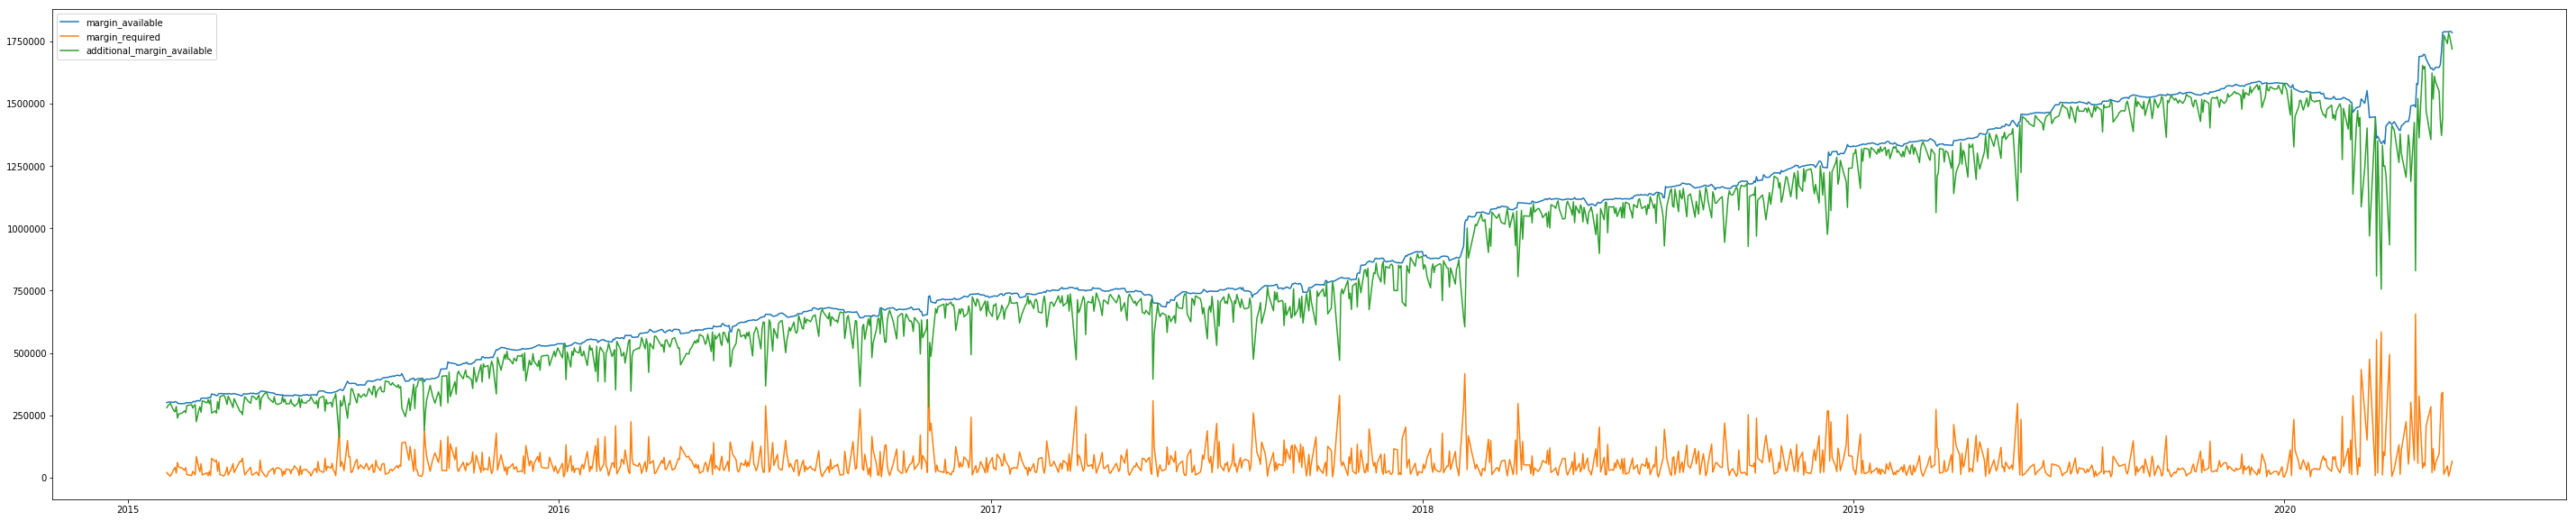

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 10))
plt.plot(margins['date'], margins['margin_available'], label = "margin_available")
plt.plot(margins['date'], margins['margin_required'], label = "margin_required")
plt.plot(margins['date'], margins['additional_margin_available'],  label = "additional_margin_available")
plt.legend()
plt.show()

In [40]:
# import numpy as np
# import matplotlib.pyplot as plt

# def stacked_bar(data, series_labels, category_labels=None, 
#                 show_values=False, value_format="{}", y_label=None, 
#                 grid=True, reverse=False):
#     """Plots a stacked bar chart with the data and labels provided.

#     Keyword arguments:
#     data            -- 2-dimensional numpy array or nested list
#                        containing data for each series in rows
#     series_labels   -- list of series labels (these appear in
#                        the legend)
#     category_labels -- list of category labels (these appear
#                        on the x-axis)
#     show_values     -- If True then numeric value labels will 
#                        be shown on each bar
#     value_format    -- Format string for numeric value labels
#                        (default is "{}")
#     y_label         -- Label for y-axis (str)
#     grid            -- If True display grid
#     reverse         -- If True reverse the order that the
#                        series are displayed (left-to-right
#                        or right-to-left)
#     """

#     ny = len(data[0])
#     ind = list(range(ny))

#     axes = []
#     cum_size = np.zeros(ny)

#     data = np.array(data)

#     if reverse:
#         data = np.flip(data, axis=1)
#         category_labels = reversed(category_labels)

#     for i, row_data in enumerate(data):
#         axes.append(plt.bar(ind, row_data, bottom=cum_size, 
#                             label=series_labels[i]))
#         cum_size += row_data

#     if category_labels:
#         plt.xticks(ind, category_labels, rotation='vertical')

#     if y_label:
#         plt.ylabel(y_label)

#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#     if grid:
#         plt.grid()

#     if show_values:
#         for axis in axes:
#             for bar in axis:
#                 w, h = bar.get_width(), bar.get_height()
#                 plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
#                          value_format.format(h), ha="center", 
#                          va="center")

In [41]:
# df2 = all_trades.groupby(['date', 'instrument'])['margin_required'].sum().unstack('instrument').fillna(0)

# df = df2.transpose()

# plt.figure(figsize=(50, 10))

# series_labels = df.index.tolist()

# data = df.values

# category_labels = df.columns.tolist()

# stacked_bar(
#     data, 
#     series_labels, 
#     category_labels=category_labels, 
#     show_values=False,
#     value_format="{:.1f}",
#     y_label="Total margin required"
# )

# plt.savefig('margin_required_opp_brokerage_return_newdata_stoploss4_{}_{}.png'.format(begin, end))
# plt.show()

# Postmartem

In [42]:
low_trades[low_trades['budget_required']==low_trades['budget_required'].max()]

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab,new_timestamp
10283,NSE:EICHERMOT,27799.0,27300.2,26802.35,low,buy,30,29,25000.0,0.05,0.0,58490.52,44,1179303.4,26829.15,26815.75,1341.5,1140.2,30,2018-02-06 15:09:00+05:30,SL,complete,32111.2,0.5,0,26379.32,2018-02-06 09:39:00


In [43]:
low_trades[low_trades['instrument']=='NSE:ULTRACEMCO']

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab,new_timestamp
16578,NSE:ULTRACEMCO,3109.90,3042.00,3030.05,low,buy,1,1,25000.0,0.05,1250.0,1292.35,9,27270.45,3033.10,3031.55,151.7,128.9,1,2015-02-06 15:09:00+05:30,SL,complete,-253.35,-0.2,0,1545.70,2015-02-06 09:39:00
16582,NSE:ULTRACEMCO,3398.00,3292.50,3261.90,low,buy,2,2,25000.0,0.05,0.0,1598.07,10,32619.00,3265.15,3263.55,163.3,138.8,2,2015-03-05 15:09:00+05:30,SL,complete,-740.50,-0.5,0,2338.57,2015-03-05 09:39:00
16584,NSE:ULTRACEMCO,3035.00,2935.00,2916.50,low,buy,3,3,25000.0,0.05,0.0,2417.81,17,49580.50,2919.40,2917.95,146.0,124.1,3,2015-03-16 15:09:00+05:30,SL,complete,-51.00,-0.0,0,2468.81,2015-03-16 09:39:00
16586,NSE:ULTRACEMCO,2829.70,2750.90,2750.00,low,buy,4,4,25000.0,0.05,0.0,2552.46,19,52250.00,2752.75,2751.40,137.6,117.0,4,2015-03-26 15:09:00+05:30,SL,complete,1065.90,0.4,0,1486.56,2015-03-26 09:39:00
16588,NSE:ULTRACEMCO,2707.80,2598.55,2595.65,low,buy,5,5,25000.0,0.05,0.0,1536.93,12,31147.80,2598.25,2596.95,129.9,110.4,5,2015-05-07 15:09:00+05:30,SL,complete,321.00,0.2,0,1215.93,2015-05-07 09:39:00
16589,NSE:ULTRACEMCO,2998.90,2924.80,2901.00,low,buy,6,6,25000.0,0.05,0.0,1292.35,9,26109.00,2903.90,2902.45,145.2,123.4,6,2015-05-26 15:09:00+05:30,SL,complete,-18.90,-0.0,0,1311.25,2015-05-26 09:39:00
16591,NSE:ULTRACEMCO,2921.00,2867.70,2825.00,low,buy,7,7,25000.0,0.05,0.0,1355.68,10,28250.00,2827.80,2826.40,141.4,120.2,7,2015-06-29 15:09:00+05:30,SL,complete,772.00,0.5,0,583.68,2015-06-29 09:39:00
16594,NSE:ULTRACEMCO,3364.70,3209.00,3203.25,low,buy,8,8,25000.0,0.05,0.0,1292.35,8,25626.00,3206.45,3204.85,160.3,136.3,8,2015-07-22 15:09:00+05:30,SL,complete,358.80,0.3,0,933.55,2015-07-22 09:39:00
16596,NSE:ULTRACEMCO,3258.00,3200.00,3196.00,low,buy,9,9,25000.0,0.05,0.0,1292.35,8,25568.00,3199.20,3197.60,160.0,136.0,9,2015-07-27 15:09:00+05:30,SL,complete,-486.80,-0.4,0,1779.15,2015-07-27 09:39:00
16598,NSE:ULTRACEMCO,3256.00,3201.35,3200.00,low,buy,10,10,25000.0,0.05,0.0,1839.43,11,35200.00,3203.20,3201.60,160.2,136.1,10,2015-08-07 15:09:00+05:30,SL,complete,72.05,0.0,0,1767.38,2015-08-07 09:39:00
